In [40]:
import scipy
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Load data
EEG_before = scipy.io.loadmat("EEG_av.mat")
EEG_during = scipy.io.loadmat("EEG_pe.mat")
EEG_after = scipy.io.loadmat("EEG_ap.mat")

EEG_before = EEG_before["EEG_before"]
EEG_during = EEG_during["EEG_during"]
EEG_after = EEG_after["EEG_after"]

# Set sampling frequency variable
fs = 512

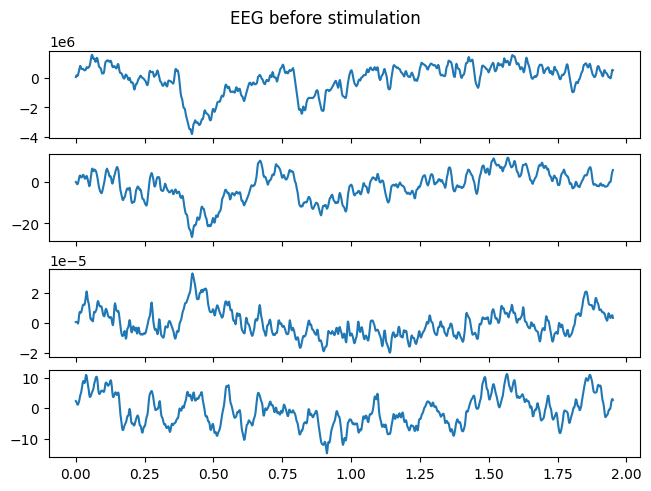

In [42]:
# Plot 4 EEG leads before stimulation
fig, axes = plt.subplots(4, 1, sharex="all", constrained_layout=True)
plt.suptitle("EEG before stimulation")
time = np.arange(0, len(EEG_before) / fs, 1 / fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before[:, i])

In [43]:
# Perform SVD
Ub, Sb, Vb = np.linalg.svd(EEG_before)
Ud, Sd, Vd = np.linalg.svd(EEG_during)
Ua, Sa, Va = np.linalg.svd(EEG_after)
# Print singular values
Before = "Singular values before: {:.2f}, {:.2f}, {:.2f}, {:.2f}"
print(Before.format(Sb[0] / max(Sb), Sb[1] / max(Sb), Sb[2] / max(Sb), Sb[3] / max(Sb)))
During = "Singular values during: {:.2f}, {:.2f}, {:.2f}, {:.2f}"
print(During.format(Sd[0] / max(Sd), Sd[1] / max(Sd), Sd[2] / max(Sd), Sd[3] / max(Sd)))
After = "Singular values after: {:.2f}, {:.2f}, {:.2f}, {:.2f}"
print(After.format(Sa[0] / max(Sa), Sa[1] / max(Sa), Sa[2] / max(Sa), Sa[3] / max(Sa)))

Singular values before: 1.00, 0.00, 0.00, 0.00
Singular values during: 1.00, 0.10, 0.07, 0.07
Singular values after: 1.00, 0.21, 0.19, 0.09


In [44]:
# Implement here the pre-processing of the signals during and after stimulation

EEG_before_normalized = (EEG_before - np.mean(EEG_before, axis=0)) / np.std(EEG_before, axis=0)
Ub_n, Sb_n, Vb_n = np.linalg.svd(EEG_before_normalized)
Before_n = """Singular values before stimulation (normalized):{:.5f}, {:.5f}, {:.5f}, {:.5f}"""
print(Before_n.format(Sb_n[0] / max(Sb_n),Sb_n[1] / max(Sb_n),Sb_n[2] / max(Sb_n),Sb_n[3] / max(Sb_n),))

EEG_during_normalized = (EEG_during - np.mean(EEG_during, axis=0)) / np.std(EEG_during, axis=0)
Ud_n, Sd_n, Vd_n = np.linalg.svd(EEG_during_normalized)
During_n = ("Singular values during stimulation (normalized): {:.5f}, {:.5f}, {:.5f}, {:.5f}")
print(During_n.format(Sd_n[0] / max(Sd_n),Sd_n[1] / max(Sd_n),Sd_n[2] / max(Sd_n),Sd_n[3] / max(Sd_n),))

EEG_after_normalized = (EEG_after - np.mean(EEG_after, axis=0)) / np.std(EEG_after, axis=0)
Ua_n, Sa_n, Va_n = np.linalg.svd(EEG_after_normalized)
After_n = ("Singular values after stimulation (normalized): {:.5f}, {:.5f}, {:.5f}, {:.5f}")
print(After_n.format(Sa_n[0] / max(Sa_n),Sa_n[1] / max(Sa_n),Sa_n[2] / max(Sa_n),Sa_n[3] / max(Sa_n),))

Singular values before stimulation (normalized):1.00000, 0.82741, 0.27099, 0.23259
Singular values during stimulation (normalized): 1.00000, 0.10128, 0.07567, 0.06634
Singular values after stimulation (normalized): 1.00000, 0.21414, 0.17477, 0.09851


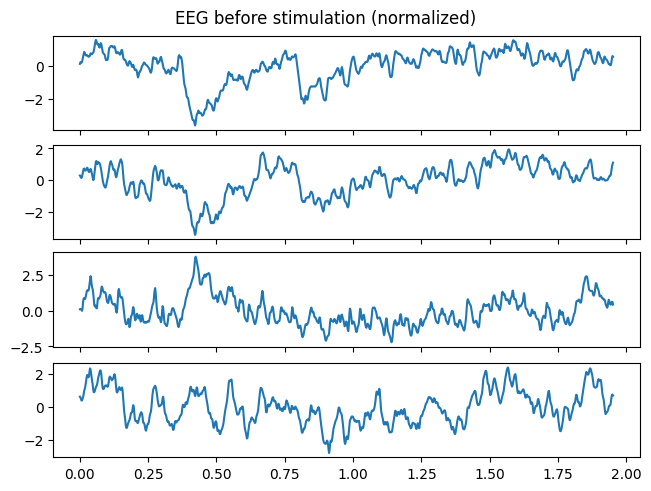

In [45]:
# Plot 4 EEG leads before stimulation
fig, axes = plt.subplots(4, 1, sharex="all", constrained_layout=True)
plt.suptitle("EEG before stimulation (normalized)")
time = np.arange(0, len(EEG_before_normalized) / fs, 1 / fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_before_normalized[:, i])

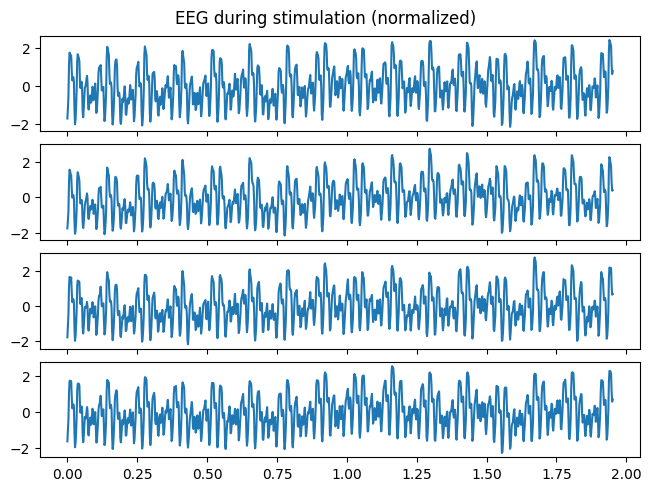

In [46]:
# Plot 4 EEG leads during stimulation
fig, axes = plt.subplots(4, 1, sharex="all", constrained_layout=True)
plt.suptitle("EEG during stimulation (normalized)")
time = np.arange(0, len(EEG_during_normalized) / fs, 1 / fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_during_normalized[:, i])

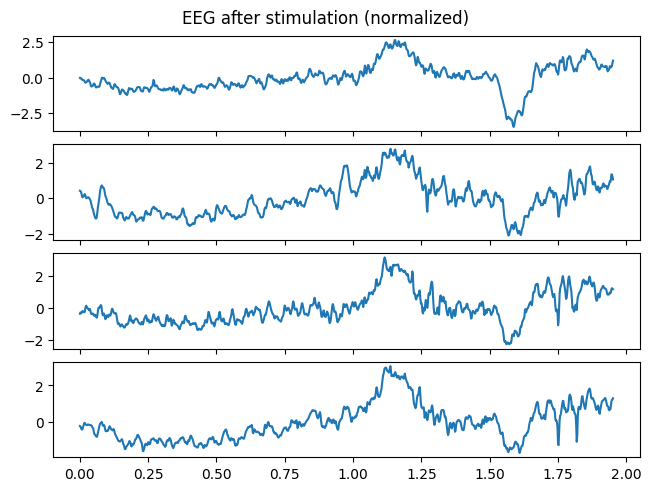

In [47]:
# Plot 4 EEG leads after stimulation
fig, axes = plt.subplots(4, 1, sharex="all", constrained_layout=True)
plt.suptitle("EEG after stimulation (normalized)")
time = np.arange(0, len(EEG_after_normalized) / fs, 1 / fs)
for i in np.arange(4):
    axes[i].plot(time, EEG_after_normalized[:, i])